In [1]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
df = pd.read_csv('C:/Users/ACER/Downloads/data.zip')

In [3]:
# Tạo một danh sách (list) để chứa dữ liệu từ DataFrame.
data_list = []
# Duyệt qua từng hàng của DataFrame df.
for index, row in df.iterrows():
    # Chuyển đổi hàng thành danh sách và thêm vào danh sách data_list.
    data_list.append(row.tolist())

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 66, 107, 189, 189, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 206, 206, 222, 255, 255, 222, 125, 125, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 210, 161, 207, 138, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 185, 135, 82, 57, 108, 236, 146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

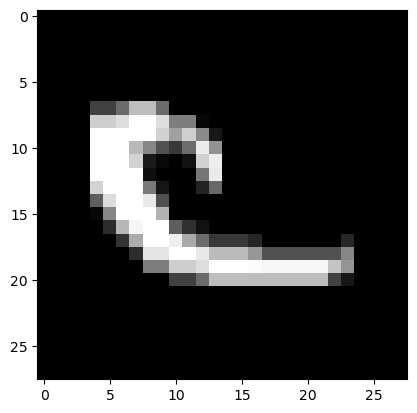

In [4]:
# Lấy dữ liệu tại hàng thứ 100,000 từ danh sách data_list và lưu vào biến letter.
letter = data_list[40000]

# Chuyển đổi chuỗi các số thành mảng NumPy, loại bỏ ký tự đầu (label), và định hình thành mảng 2D (28x28).
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

# In ra dữ liệu và hiển thị hình ảnh của biểu đồ số học.
print(letter)
plt.imshow(x, cmap='gray')

In [5]:
print(len(data_list))

372450


In [6]:
# Tạo danh sách data chứa dữ liệu từ data_list (bỏ đi ký tự đầu tiên).
data = [row[1:] for row in data_list]

# Tạo danh sách label chứa nhãn từ data_list (chỉ lấy ký tự đầu tiên).
label = [row[0] for row in data_list]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, label, train_size=0.8, shuffle=True)

In [8]:
# Tạo mô hình Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
val_pred_nb = model.predict(X_test)

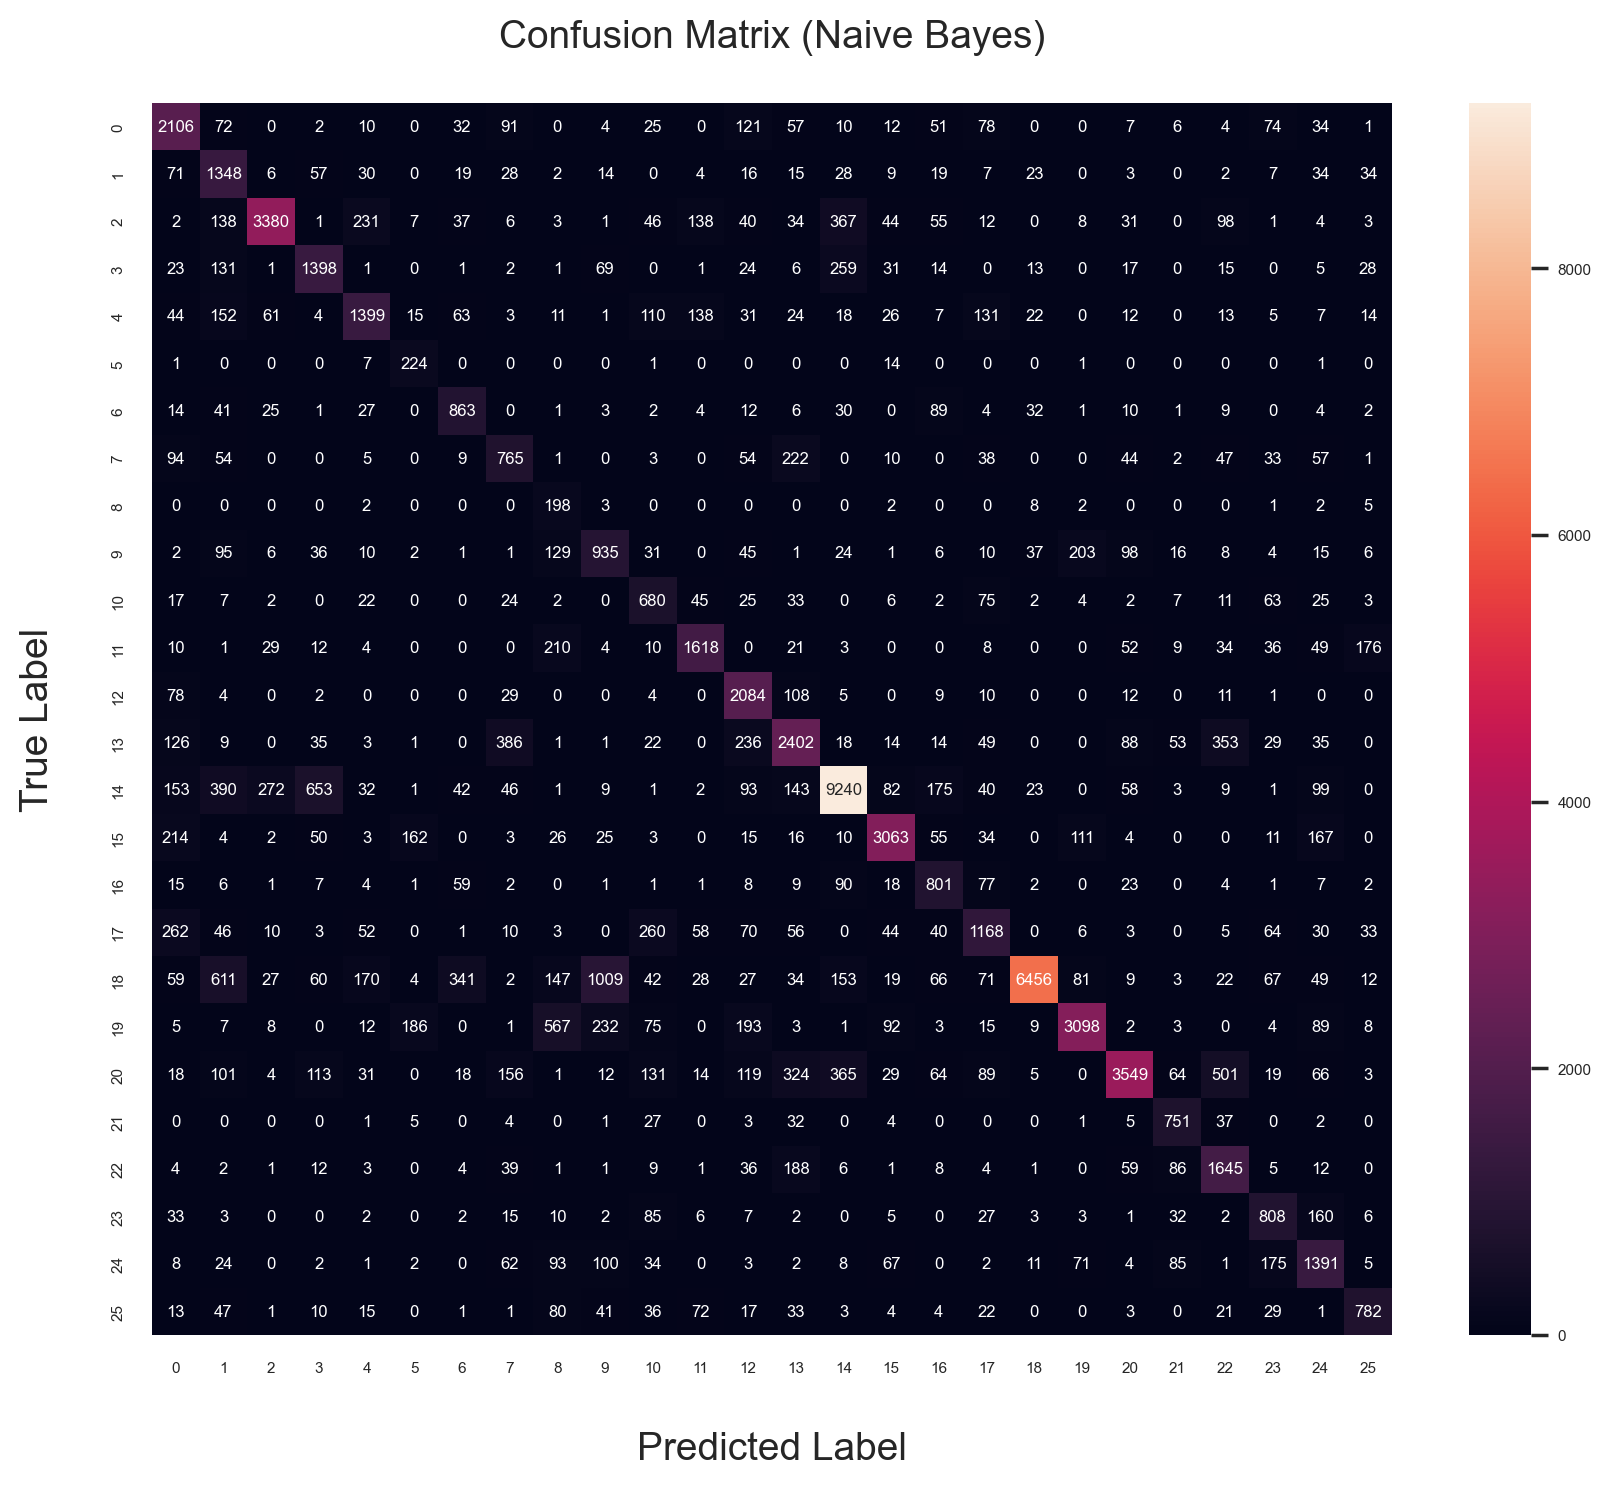

Accuracy (Naive Bayes): 0.7001208215867901
Precision (Naive Bayes): 0.6219096957003541
Recall (Naive Bayes): 0.7040416309332768
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      2797
           1       0.41      0.76      0.53      1776
           2       0.88      0.72      0.79      4687
           3       0.57      0.69      0.62      2040
           4       0.67      0.61      0.64      2311
           5       0.37      0.90      0.52       249
           6       0.58      0.73      0.65      1181
           7       0.46      0.53      0.49      1439
           8       0.13      0.89      0.23       223
           9       0.38      0.54      0.45      1722
          10       0.42      0.64      0.50      1057
          11       0.76      0.71      0.73      2286
          12       0.64      0.88      0.74      2357
          13       0.64      0.62      0.63      3875
          14       0.87      0.80      0.83     11568
       

In [9]:
plt.figure(figsize=(10,8), dpi=200)
sns.set(font_scale = 0.5)
ax = sns.heatmap(confusion_matrix(y_test, val_pred_nb), annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix (Naive Bayes)", fontsize=14, pad=20)
plt.show()
print("Accuracy (Naive Bayes):", accuracy_score(y_test, val_pred_nb))
print("Precision (Naive Bayes):", precision_score(y_test, val_pred_nb, average='macro'))
print("Recall (Naive Bayes):", recall_score(y_test, val_pred_nb, average='macro'))
print(classification_report(y_test, val_pred_nb))